In [1]:
# load packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [133]:
# import plot stylesheet and grab data
plt.style.use('apa-noBlack.mplstyle')
df = pd.read_excel('MBD Graph 2 Jewell SPED502.xlsx','PyData')

In [134]:
# drop the participant field and aggregate the data
df_agg = df.copy()
df_agg = df_agg.drop(['Participant'],axis=1)
df_agg = df_agg.groupby(['Relationship','Question','Condition']).agg(['min','max','mean'])
df_agg = df_agg.reset_index()
df_agg.columns = df_agg.columns.to_flat_index().str.join('')

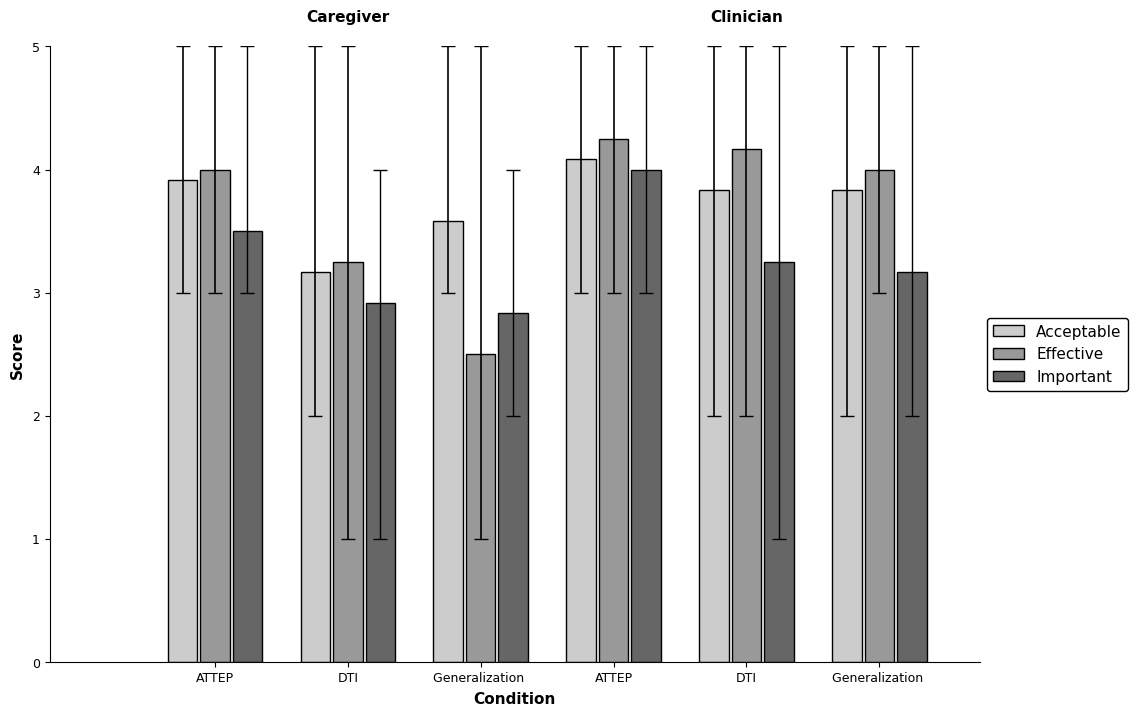

In [186]:
# generate a plot
fig, ax = plt.subplots(figsize=(12, 8))

# we'll be using these lengths a bunch
u_cond = len(df_agg.Condition.unique())
u_rel = len(df_agg.Relationship.unique())
u_quest = len(df_agg.Question.unique())

# x-axis should have as many labels as Relationships x Conditions
x = np.arange(u_cond * u_rel)

# set bar widths and gaps so that bars don't touch and clusters don't touch
bar_width = 1/(u_quest*1.5)
gap = bar_width * 0.1

# plot the bars and error bars
for i in range(u_quest):
    
    # set up the x location and the bar heights
    x_loc = x + i*(bar_width + gap)
    y_bar = df_agg.loc[df_agg['Question'] == df_agg.Question.unique()[i],'Scoremean']
    
    # plot the bars
    bar = ax.bar(x_loc
                 , y_bar
                 , width=bar_width
                 , label=df_agg.Question.unique()[i]
                 , edgecolor='#000000')
    
    # each error bar needs a midpoint and magnitude
    eb_mid = (df_agg.loc[df_agg['Question'] == df_agg.Question.unique()[i],'Scoremax'] 
              + df_agg.loc[df_agg['Question'] == df_agg.Question.unique()[i],'Scoremin']) / 2
    
    eb_range = (df_agg.loc[df_agg['Question'] == df_agg.Question.unique()[i],'Scoremax'] 
              - df_agg.loc[df_agg['Question'] == df_agg.Question.unique()[i],'Scoremin']) / 2
    
    errorbar = ax.errorbar(x_loc
                           , eb_mid
                           , yerr=eb_range
                           , color='#000000'
                           , fmt = 'none'
                           , capsize = 5)

# set axis details
ax.set_xticks(x+(u_quest-1)*(bar_width+gap)/2)
ax.set_xticklabels(np.tile(df_agg.Condition.unique(),u_rel))

ax.set_ylim([0, 5])
ax.tick_params(axis='both', which='major', labelsize=9)

ax.set_xlabel('Condition', fontsize=11)
ax.set_ylabel('Score', fontsize=11)

# add headers to each condition grouping. 
for j in range(u_rel):
    # First find the x-coord for placement
    x_head = ((bar_width + gap) + (u_cond - 1)/2) + j*u_cond
    plt.text(x_head, 5.2, df_agg.Relationship.unique()[j], fontsize=11, ha='center',weight='bold')

# add legend and name box
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), edgecolor='black', framealpha=1, fontsize=11)

# Save the plot as an image
plt.savefig('socialValidity_chart.png', dpi=300, bbox_inches='tight')

plt.show()